In [1]:
!nvidia-smi


Sun Mar 26 14:52:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.41                 Driver Version: 531.41       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti    WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8                5W /  N/A|    368MiB /  4096MiB |      7%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


#Importing Libraries

In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [4]:
ROOT_PATH=r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs'

In [5]:
pwd

'c:\\Users\\rctuh\\Desktop\\minor projects\\Vgg16_Image_Classifier'

In [6]:
import os 
os.chdir(ROOT_PATH)
os.getcwd()

'C:\\Users\\rctuh\\Desktop\\minor projects\\Vgg16_Image_Classifier\\cats_and_dogs\\cats_and_dogs'

#Resizing all images

In [7]:
IMAGE_SIZE=[224,224]

In [8]:
train_path=r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\train'
valid_path=r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\test'

#Importing VGG16 library and add preprocesing layer in front of the VGG16.
#Here we will se ImageNet weights

In [9]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

include_top= False means that we will cut off the last dense layer of pre-trained model of VGG16 as it was trained for 1000 output categories of imagenet whereas we only have 3 categories. We also cut off the 1st layer because the input image and the size can be of my choice.

In [10]:
for layers in vgg16.layers:
  print(layers)

###Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable. This is called "freezing" the layer: the state of a frozen layer won't be updated during training (either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).

In [11]:
for layer in vgg16.layers:
  layer.trainable=False

In [12]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


#Vgg16 Model Summary

In [13]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Building the Final Model 


In [14]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='Softmax'))


#View the structure of final model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


#Specifying the Cost and Optimization Methods

In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

#Using the Image Data Generator to import images from dataset

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
pwd

'C:\\Users\\rctuh\\Desktop\\minor projects\\Vgg16_Image_Classifier\\cats_and_dogs\\cats_and_dogs'

In [19]:
training_set=train_datagen.flow_from_directory(r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\validation',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')


Found 1000 images belonging to 2 classes.


In [20]:
test_set=train_datagen.flow_from_directory(r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\validation',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 1000 images belonging to 2 classes.


#Model Fitting

In [21]:
r= model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
32/32 [==============================] - 139s 4s/step - loss: 1.4411 - accuracy: 0.6470 - val_loss: 0.3299 - val_accuracy: 0.8660
Epoch 2/10
32/32 [==============================] - 141s 4s/step - loss: 0.2992 - accuracy: 0.8680 - val_loss: 0.2287 - val_accuracy: 0.9120
Epoch 3/10
32/32 [==============================] - 139s 4s/step - loss: 0.2183 - accuracy: 0.9150 - val_loss: 0.1769 - val_accuracy: 0.9340
Epoch 4/10
32/32 [==============================] - 141s 4s/step - loss: 0.1838 - accuracy: 0.9200 - val_loss: 0.1332 - val_accuracy: 0.9570
Epoch 5/10
32/32 [==============================] - 140s 4s/step - loss: 0.1476 - accuracy: 0.9510 - val_loss: 0.1372 - val_accuracy: 0.9520
Epoch 6/10
32/32 [==============================] - 140s 4s/step - loss: 0.1076 - accuracy: 0.9710 - val_loss: 0.1146 - val_accuracy: 0.9560
Epoch 7/10
32/32 [==============================] - 141s 4s/step - loss: 0.1053 - accuracy: 0.9630 - val_loss: 0.0878 - val_accuracy: 0.9770
Epoch 8/10
32

#Plotting the Losses

In [22]:
import matplotlib.pyplot as plt

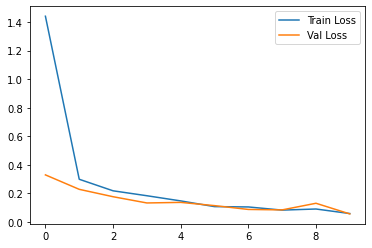

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Plotting Accuracy 


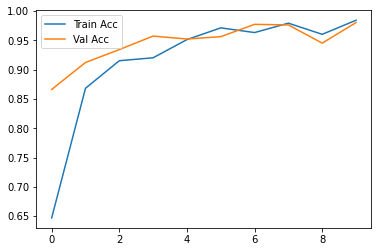

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Saving the File as .h5 Type


In [28]:
from tensorflow.keras.models import load_model 
model.save('model_vgg16.h5')

#Predictions

In [29]:
y_pred=model.predict(test_set)


32/32 [==============================] - 67s 2s/step


In [30]:
y_pred

array([[1.3120908e-04, 9.9986875e-01],
       [4.3584323e-03, 9.9564159e-01],
       [2.7629709e-01, 7.2370291e-01],
       ...,
       [7.2003488e-05, 9.9992800e-01],
       [1.2010914e-02, 9.8798907e-01],
       [9.9618787e-01, 3.8121229e-03]], dtype=float32)

In [31]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [32]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [33]:
from tensorflow.keras.preprocessing import image


In [103]:
model=load_model('model_vgg16.h5')
img_path=r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\validation\cats\cat.2012.jpg'
img=image.load_img(img_path,target_size=(224,224))


In [104]:
x=image.img_to_array(img)

In [105]:
Z=plt.imread(img_path)

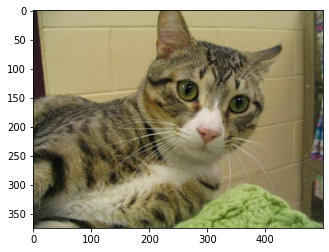

In [106]:
plt.imshow(Z)

In [107]:
x.shape


(224, 224, 3)

In [108]:
x=x/255

In [109]:
from keras.applications.vgg16 import preprocess_input 

In [110]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [112]:
model.predict(img_data)

1/1 [==============================] - 0s 128ms/step


array([[9.9995267e-01, 4.7282007e-05]], dtype=float32)

In [113]:
result=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 127ms/step


In [114]:
result

array([0], dtype=int64)

In [118]:
if result[0] == 1:
  prediction = "The Given Image is of a Dog"
  print(prediction)
else:
  prediction="The Given Image is of a cat"
  print(prediction)
  

The Given Image is of a cat
